<h1 style="font-size:40px;"><center>Exercise II:<br> Model selection with MLPs
</center></h1>


# Short summary
In this exercise you will: 

* train MLPs and for both classification and regression problems and perform model selection to optimize validation performance

There are 10 questions in this exercise. These 10 questions can be found in five different cells below (see section "The Different Cells"). All of the exercises deal with training and evaluation of the multi-layer perceptron (MLP) network. You are going to work with different datasets, binary and multiple classification problems and a regression problem. For questions 1-6, code is available that you can run directly or only need to make small modifications to. For questions 7-10 we only provide parts of the code and you should add the rest. However, it is typically just a matter of paste and copy from the previous code cells (in a proper way).

You should write the report of the exercise within this notebook. The details of how to do that can be found below in section "Writing the report". Finally before you start:

**Deadline for submitting the report: December 10, 13:00 (2021)**

## The data
There are several datasets in this exercise. 

### syn2
The *syn2* dataset represents a binary classification problem. The input data is 2D which allows for an easy visual inspection of the different classes and the decision boundary implemented by the network. The dataset is generated "on the fly" each time. Data are generated from various normal distributions. Since they are generated using random numbers it means that each time you generate the data it will be slightly different from next time. You can control this by having a fixed *seed* to the random number generator. The cell "PlotData" will plot the *syn2* dataset.

Note: This is the same dataset as in exercise 1.

### regr2
There is also a synthetic regression problem, called *regr2*. It has 6 inputs (independent variables) and one output variable (dependent variable). It is generated according to the following formula:  

$\qquad d = 2x_1 + x_2x_3^2 + e^{x_4} + 5x_5x_6 + 3\sin(2\pi x_6) + \alpha\epsilon$  
    
where $\epsilon$ is added normally distributed noise and $\alpha$ is a parameter controlling the size of the added noise. Variables $x_1,...,x_4$ are normally distrubuted with zero mean and unit variance, whereas $x_5, x_6$ are uniformly distributed ($[0,1]$). The target value $d$ has a non-linear dependence on ***x***.

### Spiral data
This is the "famous" spiral dataset that consists of two 2-D spirals, one for each class. The perfect classification boundary is also a spiral. The cell "PlotData" will plot this dataset.

### Japanese vowels dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels* In short, nine male speakers uttered two Japanese vowels /ae/ successively. For each utterance, a discrete times series was produced where each time point consists of 12 (LPC cepstrum) coefficients. The length of each time series was between 7-29. 
Here we treat each point of the time series as a feature (12 inputs). In total we have 9961
data points which then has been divided into 4274 for training, 2275 for validation and 3412 for test. The original data files are provided as *ae.train* and *ae.test*. The task is now based on a single sample value of one of the speakers, determine which speaker it was. This is, in summary, a 9-class classification problem with 12 input values for each case.

### Bioconcentration dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/QSAR+Bioconcentration+classes+dataset* In short, this is a dataset of manually-curated bioconcentration factors (BCF) for 779 chemicals used to determine the mechanisms of bioconcentration, i.e. to predict whether a chemical: (1) is mainly stored within lipid tissues, (2) has additional storage sites (e.g. proteins), or (3) is metabolized/eliminated. Data were randomly split into a training set of 584 compounds (75%) and a test set of 195 compounds (25%), preserving the proportion between the classes. The independent variables consist of 9 molecular descriptors. This is, in summary, a 3-class classification problem with 9 input values for each case.

## The questions
There are 10 questions, where the first 3 questions are dealing with 2D binary classification problems. Here you will be able to see the boundary implemented by the different MLPs that you train. Questions 4-6 deals with training a regression network for the *regr2* dataset. Question 7-8 deals with Japanese vowels classification problem, here your task is to come up with a model that optimizes the validation result. Question 9 is for the Bioconcentration dataset, and again you should come up with a good model. Finally, the last question is to find a model that can solve the spiral problem.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | MLP | Needed | Defines the MLP model |
| 3 | Data | Needed | Defines the functions to generate the artificial datasets |
| 4 | PlotData | Information | Plots the 2D classification datasets |
| 5 | Statistics | Needed | Defines the functions that calculates various performance measures |
| 6 | Boundary | Needed | Function that can show 2D classification boundaries | 
| 7 | Confusion | Needed | Functions that plots the confusion matrix | 
| 8 | Ex1 | Exercise | For question 1-3 |
| 9 | Ex2 | Exercise | For question 4-6 |
| 10 | Ex3 | Exercise | For question 7-8 |
| 11 | Ex4 | Exercise | For question 9 |
| 12 | Ex5 | Exercise | For question 10 |

In order for you to start with the exercise you need to run all cells with the celltype "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" or "Run all above" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question! 

## Last but not least
Have fun!

---

# Cells

## Setup

### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries

In the cell below, we import all the libraries that are needed for this exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [7]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras import metrics, regularizers, optimizers
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tqdm.keras import TqdmCallback

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import scipy as sp
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, log_loss, classification_report
import pandas as pd

### CellName: MLP (#2)
### CellType: Needed
### Cell instruction: Defining the MLP model

This cell defines the MLP model. There are a number of parameters that is needed to 
define a model. Here is a list of them: 


* inp_dim: the input dimension (integer)

* n_nod: size of the network, eg [5] for a one hidden layer with 5 nodes and [5,3] for a two layer network with 5 and 3 hidden nodes each.

* drop_nod: Dropout parameter for each hidden layer. You can specipty a single number that will be used for all hidden layers. If you want different dropout parameters for each hidden layer, then specify as a list. Example, for a two hidden layer network drop_nod = [0.5, 0.75] means drop hidden nodes with probability 0.5 and 0.75 for the first and the second hidden layer, respectively. Note that we do not use dropout on the input nodes! Also, a value of 0 means no dropout (i.e. zero probability of removing a node).

* act_fun: the activation function. Most common are
    * 'linear'
    * 'relu'
    * 'tanh'
    * 'sigmoid'
        
* out_act_fun: the activation function for the output nodes. Most common are
    * 'linear'
    * 'sigmoid'
    * 'softmax'
    
* opt_method: The error minimization method. Common choices
    * 'SGD'
    * 'Adam'
    * 'Nadam'
    * 'RMSprop'
    
* cost_fun: The error function used during training. There are three common ones
    * 'mean_squared_error'
    * 'binary_crossentropy'
    * 'categorical_crossentropy'

* lr_rate: The learning rate. 

* metric: The metric to use besides the loss. Common values
    * accuracy
    * mse

* lambd: L2 regularization parameter

* num_out: The number of output nodes

Run the cell by entering into the cell and press "CTRL Enter".

In [81]:
def mlp(inp_dim,
            n_nod,
            drop_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            metric = 'accuracy',
            lambd = 0.0, 
            num_out = None):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for i, nod in enumerate(n_nod):
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        if type(drop_nod) is list: 
            X = Dropout(drop_nod[i])(X)
        else: 
            X = Dropout(drop_nod)(X)
        
    output = Dense(num_out, activation = out_act_fun )(X)
    
    method = getattr(optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    # model.compile(optimizer = method(lr = lr_rate),
    model.compile(optimizer = method(learning_rate = lr_rate),
                  loss = cost_fun,
                  metrics=[metric])       
    
    return model



### CellName: Data (#3)
### CellType: Needed
### Cell instruction: Defining synthetic data sets

This cell defines the different synthetic data sets. It also provides functions for reading the Vowles dataset, the Bioconcentration dataset and the Spiral data. The last function is used for standardization of the data. 

Run the cell by entering into the cell and press "CTRL Enter".

In [9]:
def syn2(N):
    
    global seed
     
    x = np.empty(shape=(N,2), dtype = np.float32)  
    d = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)

    # Positive samples
    x[:N1,:] = 0.8 + np.random.normal(loc=.0, scale=1., size=(N1,2))

    # Negative samples 
    x[N1:,:] = -.8 + np.random.normal(loc=.0, scale=1., size=(N-N1,2))
    
    # Target
    d[:N1] = np.ones(shape=(N1,))
    d[N1:] = np.zeros(shape=(N-N1,))

    return x,d


def regr2(N, v=0):

    global seed

    x = np.empty(shape=(N,6), dtype = np.float32)  
    
    uni = lambda n : np.random.uniform(0,1,n)
    norm = lambda n : np.random.normal(0,1,n)
    noise =  lambda  n : np.random.normal(0,1,n)
    
    
    for i in range(4):
        x[:,i] = norm(N)
    for j in [4,5]:
        x[:,j] = uni(N)
    
    d =   2*x[:,0] + x[:,1]* x[:,2]**2 + np.exp(x[:,3]) + \
            5*x[:,4]*x[:,5]  + 3*np.sin(2*np.pi*x[:,5])
    std_signal = np.std(d)
    d = d + v * std_signal * noise(N)
        
    return x, d

def twospirals(n_points, turns = 3, noise=0.5):
    """
     Returns the two spirals dataset.
    """
    n = (np.random.rand(n_points,1)*0.95+0.05) * turns * (2*np.pi)
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

def vowels():
    
    def pre_proc(file_name):
        block = []
        x = []
    
        with open(file_name) as file:
            for line in file:    
                if line.strip():
                    numbers = [float(n) for n in line.split()]
                    block.append(numbers)
                else:
                    x.append(block)
                    block = []
                
        ################################
        x = [np.asarray(ar) for ar in x]    
        return x

    x_trn = pre_proc('ae.train')
    x_tst = pre_proc('ae.test')

    
    ############## LABELS###########
    chunk1 = list(range(30,270, 30))
    d_trn = []
    person = 0

    for i, block in enumerate(x_trn):
        if i in chunk1:
            person += 1
        d_trn.extend([person]*block.shape[0])
        
    chunk2 = [31,35,88,44,29,24,40,50,29]
    chunk2 = np.cumsum(chunk2)
    d_tst = []
    person = 0
    for i, block in enumerate(x_tst):
        if i in chunk2:
            person += 1
        d_tst.extend([person]*block.shape[0])

    x_trn = np.vstack(x_trn)
    x_tst = np.vstack(x_tst)
    
    ## Split into train, validation and test
    num_classes = 9
    d_trn = keras.utils.to_categorical(d_trn, num_classes)
    d_tst = keras.utils.to_categorical(d_tst, num_classes)

    from sklearn.model_selection import train_test_split
    x_tst, x_val, d_tst, d_val = train_test_split(x_tst, d_tst, test_size=0.4, random_state=41)

    return x_trn, d_trn, x_val, d_val, x_tst, d_tst

def bcf():

    bcf_trn = pd.read_csv("Grisoni_trn.csv", delimiter='\t')
    bcf_tst = pd.read_csv("Grisoni_tst.csv", delimiter='\t')

    x_trn = bcf_trn.iloc[:,3:12].values.astype(np.float32)
    d_trn = bcf_trn.iloc[:,12].values.astype(np.float32) - 1.0
    d_trn = keras.utils.to_categorical(d_trn, 3)

    x_tst = bcf_tst.iloc[:,3:12].values.astype(np.float32)
    d_tst = bcf_tst.iloc[:,12].values.astype(np.float32) - 1.0
    d_tst = keras.utils.to_categorical(d_tst, 3)
    
    return x_trn, d_trn, x_tst, d_tst

def standard(x):
    return np.mean(x, axis=0) , np.std(x, axis=0)
    

### CellName: PlotData (#4)
### CellType: Information
### Cell instruction: Plotting the data

Here we just generate 100 cases for syn2 and the spiral dataset and plot them. 

Run the cell by entering into the cell and press "CTRL Enter". 

**Note!** This cell is not needed for the actual exercises, it is just to visualize the four different 2D synthetic classification data sets.

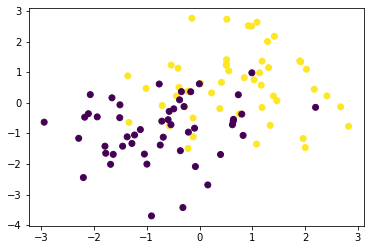

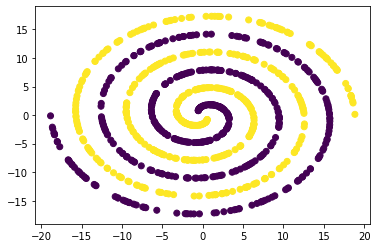

In [10]:
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

x,d = syn2(100)
plt.figure(2)
plt.scatter(x[:,0],x[:,1], c=d)

x,d = twospirals(500, 3, 0)
plt.figure(4)
plt.scatter(x[:,0],x[:,1], c=d)


### CellName: Statistics (#5)
### CellType: Needed
### Cell instruction: Present result for both classification and regression problems

This cell defines two functions that we are going to call using a trained model to calculate both error and performance measures. 

Run the cell by entering into the cell and press "CTRL Enter".

In [11]:
def stats_class(x = None, y = None, label = 'Training', modl = None):
    """
    input :  
             x = input
             y = output
             label = "Provided text string"
             modl = the model
             
    output : 
             sensitivity = fraction of correctly classified positive cases
             specificity = fraction of correctly classified negative cases
             accuracy = fraction of correctly classified cases
             loss = typically the cross-entropy error
    """
    
    def binary(y1):
        y1[y1>.5] = 1.
        y1[y1<= .5] = 0.        
        return y1

    y_pr = modl.predict(x, batch_size = x.shape[0], verbose=0).reshape(y.shape)
                
    nof_p, tp, nof_n, tn = [np.count_nonzero(k) for k in [y==1, y_pr[y==1.] > 0.5, y==0, y_pr[y==0.]<= 0.5]]
    
    sens = tp / nof_p
    spec = tn / nof_n
    acc = (tp + tn) / (len(y))
    loss = modl.evaluate(x, y , batch_size =  x.shape[0], verbose=0)
                
    A = ['Accuracy', 'Sensitivity', 'Specificity', 'Loss']
    B = [acc, sens, spec, loss[0]]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.4f}'.format(A[i], B[i]))

    return print('\n','#'*50)

def stats_reg(d = None, d_pred = None, label = 'Training', estimat = None):
    
    A = ['MSE', 'CorrCoeff']
    
    pcorr = np.corrcoef(d, d_pred)[1,0]
    
    if label.lower() in ['training', 'trn', 'train']:
        mse = estimat.history['loss'][-1]
    else:
        mse = estimat.history['val_loss'][-1] 

    B = [mse, pcorr]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.10f}'.format(A[i], B[i]))

    return print('\n','#'*50)


### CellName: Confusion (#6)
### CellType: Needed
### Cell Instruction: Plot the confusion matrix

This cell defines the functions need to plot a confusion matrix. A confusion matrix is a summary of the predictions made by a classifier. Each column of the matrix represents the instances of the predicted class while each row represents the instances of the actual class. The function 'plot_confusion_matrix' does the actual plotting, while the 'make_cm_plot' is the one that should be called from the user. See example of usage in the exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [12]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def make_cm_plot(model,
            inp,
            trg,
            num_classes,
            label='Test data'):
    
    print('\n','#'*10,'Result for {}'.format(label), '#'*10, '\n')

    y = model.predict(inp, verbose=0 )
    print('log_loss:   ', '{:.4f}'.format(log_loss(trg, y, eps=1e-15)))

    d_class = trg.argmax(axis=1)
    y_class = y.argmax(axis=1)
    print('accuracy:   ', '{:.4f}'.format((y_class==d_class).mean()), '\n')

    class_names = ['class {}'.format(i+1) for i in range(num_classes)]
    print(classification_report(d_class, y_class, target_names=class_names))

    confuTst = confusion_matrix(d_class, y_class)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = class_names,
                          title        = "Confusion Matrix")

    

### CellName: Boundary (#7)
### CellType: Needed
### Cell Instruction: Decision boundary

This cell defines the function to plot the decision boundary for a 2D input binary MLP classifier. 

Run the cell by entering into the cell and press "CTRL Enter".

In [13]:
def decision_b(X, Y1, model ):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # grid stepsize
    h = 0.025

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    Z[Z>.5] = 1
    Z[Z<= .5] = 0

    Y_pr = model.predict(X, batch_size = X.shape[0], verbose=0).reshape(Y1.shape)
  
    Y = np.copy(Y1)
    Y_pr[Y_pr>.5] = 1
    Y_pr[Y_pr<= .5] = 0
    Y[(Y!=Y_pr) & (Y==0)] = 2
    Y[(Y!=Y_pr) & (Y==1)] = 3
    
    
    plt.figure()
    #plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha = .9) 
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    
    plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], marker='+', c='k')
    plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], marker='o', c='k')
       
    plt.scatter(X[:, 0][Y==3], X[:, 1][Y==3], marker = '+', c='r')   
    plt.scatter(X[:, 0][Y==2], X[:, 1][Y==2], marker = 'o', c='r')
    
    
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.show()


### Val-err/Epoch Real Time Plot

In [ ]:
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """

    def __init__(self, update_freq=1):
        self.update_freq = update_freq

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        if epoch%self.update_freq==0:
            # Plotting
            metrics = [x for x in logs if 'val' not in x]
            
            f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
            clear_output(wait=True)

            for i, metric in enumerate(metrics):
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics[metric], 
                            label=metric)
                if logs['val_' + metric]:
                    axs[i].plot(range(1, epoch + 2), 
                                self.metrics['val_' + metric], 
                                label='val_' + metric)
                    
                axs[i].legend()
                axs[i].grid()

            plt.tight_layout()
            plt.show()

---
End of "Needed" and "Information" cells. Below are the cells for the actual exercise.

---

## Exercises

### CellName: Ex1 (#8)
### CellType: Exercise
### Cell instruction: Instruction for question 1-3

The cell below should be used for questions 1-3. For question 1 you can run the cell as it is (i.e. CTRL-Return). For the other questions you need to modify the cell in order to change hyper parameters etc. 

From now on we will talk about *performance*! It can be performance of a trained model on the training dataset or the performance on the validation dataset. What do we mean by performance?  For classification problems we will provide 4 different measurements as returned by a call to the *stats_class* function. They are:
* Sensitivity = fraction of correctly classified "1" cases
* Specificity = fraction of correctly classified "0" cases
* Accuracy = fraction of correctly classified cases
* loss = cross-entropy error (so low loss means good performance!)

For the questions in this exercise, accuracy is an appropriate performance measure.

### Question 1
Here you are going to train a classifier for the *syn2* dataset. You are also going to use a validation dataset as an estimate of the *true* performance. Since we generate these datasets we can allow for a relatively large validation dataset in order to get a more accurate estimation of *true* performance. The default value in the cell is to generate 1000 validation data points. 

Now, use *syn2*(100 training data points) and train a *linear* MLP to separate the two classes, i.e. use a single hidden node. **What is the performance you get on the validation dataset?** 

**Note:** Use a fixed random seed for this exercise since you will compare with runs in the next questions.

**Hint:** Remember for the first computer exercise that you should average over a few trained models.

### Question 2
You are now going to train this model to a high training accuracy! By increasing the number of hidden nodes we should be able to get better and better training performance. **(a) How many hidden nodes do you need to reach an accuracy >95% on your training dataset?** **(b) What is the performance on the validation data set?**

**Hint:** Remember from the first computer exercise that overtraining often means finding good local minimum of the loss function, which may require some tuning of the hyper parameters that controls the training. This means that you may have to change the learning rate, batch size and the number of epochs. Since the *Adam* method is usually better than the vanilla *stochastic gradient descent*, it is therefore used in the cells below as the default minimizer. 

### Question 3
However, we are almost always interested in optimal validation performance. You should now find the number of hidden nodes that optimize the validation performance. **(a) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?** **(b) Try to give an explanation for the number you obtained?**


In [10]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 3
np.random.seed(seed) if seed else None

# Generate training data
x_trn, d_trn = syn2(100)
x_val, d_val = syn2(1000)

# Standardization of inputs
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [1],                      # architecture
         'drop_nod': 0.0,                   # dropout specification
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.05 ,                  # learningrate
         'num_out' : 1 }                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_ex1 = mlp(**INPUT)

# Print a summary of the model
model_ex1.summary()

# Train the model
estimator_ex1 = model_ex1.fit(x_trn, d_trn,
                      epochs = 500,      
                      validation_data=(x_val, d_val),
                      batch_size=25,
                      verbose = 0)

print('DONE')

# # Call the stats function to print out statistics for classification problems
    # stats_class(x_trn, d_trn, 'Training', model_ex1)
    # stats_class(x_val, d_val, 'Validation', model_ex1)

    # # Training history
    # plt.figure()
    # plt.ylabel('Loss / Accuracy')
    # plt.xlabel('Epoch')
    # for k in estimator_ex1.history.keys():
    #     plt.plot(estimator_ex1.history[k], label = k) 
    # plt.legend(loc='best')
    # plt.show()

    # # Show the decision boundary for the training dataset
    # decision_b(x_trn, d_trn, model_ex1)

    # # If you uncomment this one you will see how the decsion boundary is with respect to the validation data
    # decision_b(x_val, d_val, model_ex1)


C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
DONE
Wall time: 2min 10s



 ########## STATISTICS for Training Data ########## 

Accuracy        0.8500
Sensitivity     0.8200
Specificity     0.8800
Loss            0.3293

 ##################################################

 ########## STATISTICS for Validation Data ########## 

Accuracy        0.8780
Sensitivity     0.9000
Specificity     0.8560
Loss            0.2907

 ##################################################


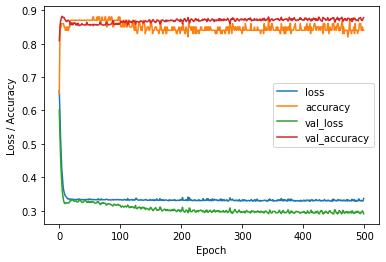

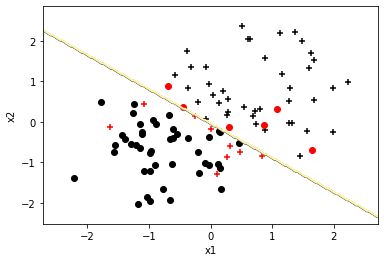

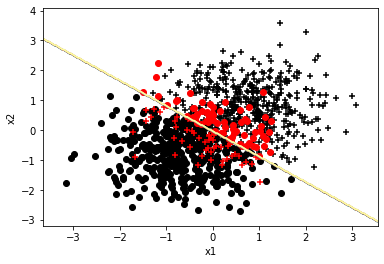

In [11]:

# Call the stats function to print out statistics for classification problems
stats_class(x_trn, d_trn, 'Training', model_ex1)
stats_class(x_val, d_val, 'Validation', model_ex1)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Show the decision boundary for the training dataset
decision_b(x_trn, d_trn, model_ex1)

# If you uncomment this one you will see how the decsion boundary is with respect to the validation data
decision_b(x_val, d_val, model_ex1)


### CellName: Ex2 (#9)
### CellType: Exercise
### Cell instruction: Instruction for question 4-6

Now we are going to look at a regression problem. The data as described above (regr2) consists of 6 inputs (features) and one output (target) value. As for the previous exercise a new data set is generated each time you call the *regr2* function. To get exactly the same data set between different calls, use a fixed seed. For this problem we can control the amount of noise added to the target value. We are going to use a relatively small training dataset (250) and a larger validation dataset (1000) to get a more robust estimation of the generalization performance, and 0.4 units of noise. For regression problems we also need new performance measures. The *stats_reg* function will give you two such measures:
* MSE = mean squared error (low error mean good performance)
* CorrCoeff = Pearson correlation coefficient for the scatter plot between predicted and true values.

The cell below can be used as an template for all questions regarding this regression problem.

#### Extra question
The extra questions is provided if you have extra time. **These question are not required for the course and does not influence any grading.** 

Repeat Q4-Q6 using two hidden layers.


In [14]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 9
np.random.seed(seed) if seed else None

# Generate training and validation data
x_trn, d_trn = regr2(250, 0.4)
x_val, d_val = regr2(1000, 0.4)

# Standardization of both inputs and targets
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

mu, std = standard(d_trn)
d_trn = (d_trn - mu) / std
d_val = (d_val - mu) / std

Wall time: 4.99 ms


### Question 4
*Model selection based on the number of hidden nodes (in a single hidden layer).* Find the number of hidden nodes that gives best validation performance. **How many hidden nodes do you find that gives best validation performance?** Make a note of the best validation MSE (or correlation coefficient) you get.

**Hint:** A good strategy is to start with a "small" model and increase the number of hidden nodes and monitor the validation result.  

In [35]:

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [10],                  
         'drop_nod': 0.0,                
         'act_fun': 'tanh',             
         'out_act_fun': 'linear',      
         'opt_method': 'Adam',         
         'cost_fun': 'mse',           
         'lr_rate': 0.025,            
         'metric': 'mse',              
         'lambd' : 0.0,             
         'num_out' : 1 }    

# Get the model
model_ex2 = mlp(**INPUT)

# Print a summary of the model
model_ex2.summary()


#     keras.callbacks.ModelCheckpoint(
    #         filepath="model_ex2_.keras",
    #         save_best_only=True,
    #         monitor="val_loss")
    # ]

    # class CustomCallback(keras.callbacks.Callback):
    #     def on_epoch_end(self, epoch, logs=None):
    #         if epoch == 0:
    #             return
    #         if epoch % 100 == 1:
    #             print('hej')


# Train the model
estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                      epochs = 500,                     
                      validation_data=(x_val,d_val),
                      batch_size=50,                    
                      verbose = 0)


    # # Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
    # pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
    # pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
    # stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
    # stats_reg(d_val, pred_val, 'Validation', estimator_ex2)

    # # Scatter plots of predicted and true values
    # plt.figure()
    # plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
    # plt.legend()
    # plt.figure()
    # plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
    # plt.legend()
    # plt.show()


    # # Training history
    # plt.figure()
    # plt.ylabel('Loss')
    # plt.xlabel('Epoch')
    # for k in ['loss', 'val_loss']:
    #     plt.plot(estimator_ex2.history[k], label = k) 
    # plt.legend(loc='best')

C:\Users\Nils\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 6)]               0         
                                                                 
 dense_26 (Dense)            (None, 10)                70        
                                                                 
 dropout_13 (Dropout)        (None, 10)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________



 ########## STATISTICS for Training Data ########## 

MSE             0.2481020093
CorrCoeff       0.8720315479

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5112411380
CorrCoeff       0.7076764081

 ##################################################


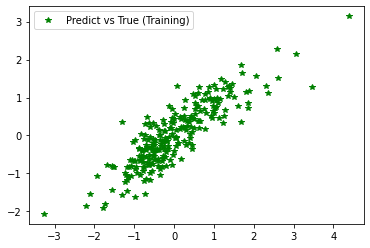

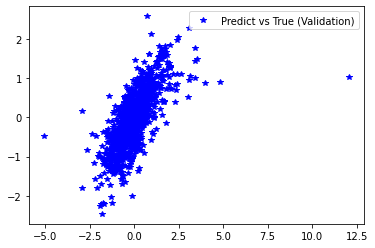

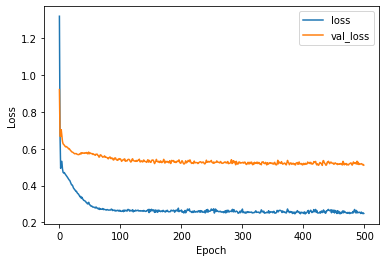

In [34]:

# Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
stats_reg(d_val, pred_val, 'Validation', estimator_ex2)

# Scatter plots of predicted and true values
plt.figure()
plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()


# Training history
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Epoch')
for k in ['loss', 'val_loss']:
    plt.plot(estimator_ex2.history[k], label = k) 
plt.legend(loc='best')

### Question 5
*Model selection based on L2 (weight decay).* Instead of using the number of hidden nodes to control the complexity we can use a regularization term added to the error function. You are going to control the complexity by adding a *L2* regularizer (see the "INPUT" dictionary in the cell). For the L2 regularization to make sense we need a start model that is capable being overtrained. The suggestion is to use at least twice as many hidden nodes for this question compared to what you found in Q4. You should modify the *L2* value until you find optimal validation performance. **(a) Present your optimal model (L2 value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4?**


In [79]:

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [15],                  
         'drop_nod': 0.0,                
         'act_fun': 'tanh',             
         'out_act_fun': 'linear',      
         'opt_method': 'Adam',         
         'cost_fun': 'mse',           
         'lr_rate': 0.025,            
         'metric': 'mse',              
         'lambd' : 0.01,             
         'num_out' : 1 }    

# Get the model
model_ex2 = mlp(**INPUT)

# Print a summary of the model
model_ex2.summary()


callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="q5_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Train the model
estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                      epochs = 500,                     
                      validation_data=(x_val,d_val),
                      batch_size=50,
                      callbacks = callbacks,                    
                      verbose = 0)




C:\Users\Nils\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 6)]               0         
                                                                 
 dense_66 (Dense)            (None, 15)                105       
                                                                 
 dropout_33 (Dropout)        (None, 15)                0         
                                                                 
 dense_67 (Dense)            (None, 1)                 16        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________



 ########## STATISTICS for Training Data ########## 

MSE             0.2068088502
CorrCoeff       0.9260342317

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.3871167898
CorrCoeff       0.8182193817

 ##################################################


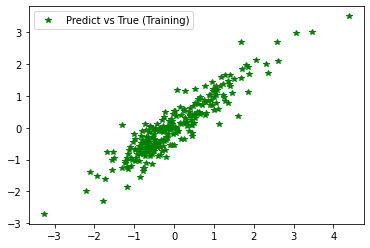

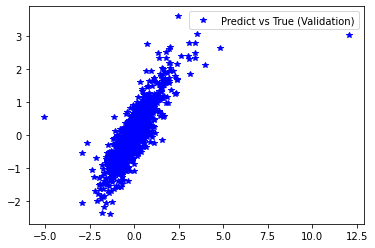

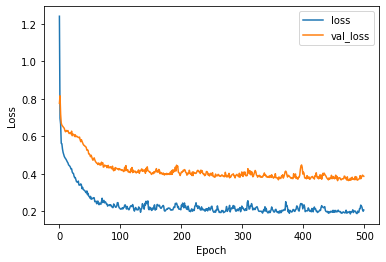

In [82]:

# Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
stats_reg(d_val, pred_val, 'Validation', estimator_ex2)

# Scatter plots of predic.
# ted and true values
plt.figure()
plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()


# Training history
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Epoch')
for k in ['loss', 'val_loss']:
    plt.plot(estimator_ex2.history[k], label = k) 
plt.legend(loc='best')

### Question 6
*Model selection based on dropout.* Instead of using the *L2* regularizer we can use dropout. In short, repeat Q5, but use the *dropout* parameter instead. **(a) Present your optimal model (dropout value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4/Q5?** 

**Hint:** Using dropout may require even more hidden nodes to start with! 


##### Base

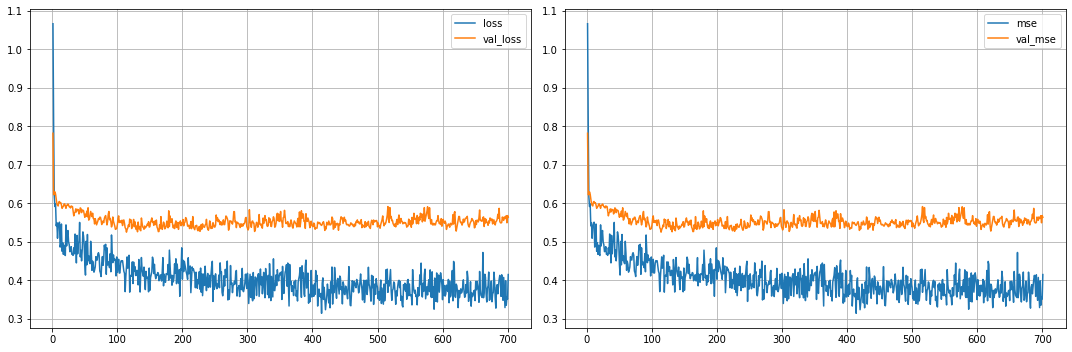

4/4 [==============================] - 1s 228ms/step - loss: 0.4143 - mse: 0.4143 - val_loss: 0.5629 - val_mse: 0.5629
Epoch 702/2000
4/4 [==============================] - 0s 44ms/step - loss: 0.3812 - mse: 0.3812 - val_loss: 0.5735 - val_mse: 0.5735
Epoch 703/2000
4/4 [==============================] - 0s 44ms/step - loss: 0.3855 - mse: 0.3855 - val_loss: 0.5795 - val_mse: 0.5795
Epoch 704/2000
4/4 [==============================] - 0s 40ms/step - loss: 0.3531 - mse: 0.3531 - val_loss: 0.5673 - val_mse: 0.5673
Epoch 705/2000
4/4 [==============================] - 0s 46ms/step - loss: 0.3607 - mse: 0.3607 - val_loss: 0.5668 - val_mse: 0.5668
Epoch 706/2000
4/4 [==============================] - 0s 45ms/step - loss: 0.3429 - mse: 0.3429 - val_loss: 0.5687 - val_mse: 0.5687
Epoch 707/2000
4/4 [==============================] - 0s 38ms/step - loss: 0.3576 - mse: 0.3576 - val_loss: 0.5515 - val_mse: 0.5515
Epoch 708/2000
4/4 [==============================] - 0s 41ms/step - loss: 0.3515 -

KeyboardInterrupt: 

In [135]:

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [50],                  
         'drop_nod': 0.5,                
         'act_fun': 'tanh',             
         'out_act_fun': 'linear',      
         'opt_method': 'Adam',         
         'cost_fun': 'mse',           
         'lr_rate': 0.025,            
         'metric': 'mse',              
         'lambd' : 0.0,             
         'num_out' : 1 }
             
# Get the model
model_ex2 = mlp(**INPUT)

# Print a summary of the model
model_ex2.summary()

# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="q6_model.keras",
#         save_best_only=True,
#         monitor="val_mse")
# ]
    
# Train the model
estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                      epochs = 2000,                     
                      validation_data=(x_val,d_val),
                      batch_size=64,
                    #   callbacks=[TqdmCallback(verbose=1)],                    
                      # callbacks=[TqdmCallback(verbose=1),PlotLearning(update_freq=10)],                    
                      callbacks=[PlotLearning(update_freq=100)],                    
                      verbose = 1)




 ########## STATISTICS for Training Data ########## 

MSE             0.2686966062
CorrCoeff       0.9279280542

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.6335136294
CorrCoeff       0.6288953474

 ##################################################


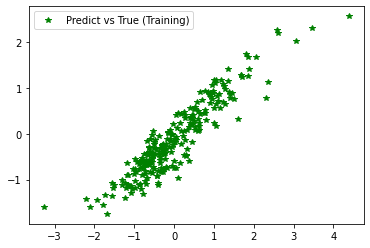

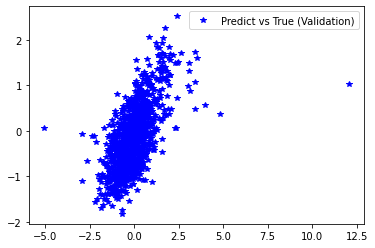

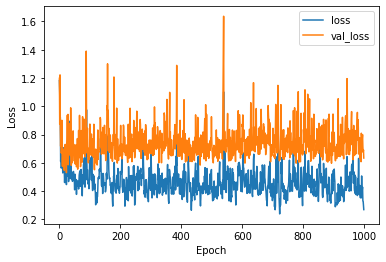

In [94]:
# model_ex2 = keras.models.load_model("q6_model.keras")
# Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
stats_reg(d_val, pred_val, 'Validation', estimator_ex2)

# Scatter plots of predicted and true values
plt.figure()
plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()


# Training history
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Epoch')
for k in ['loss', 'val_loss']:
    plt.plot(estimator_ex2.history[k], label = k) 
plt.legend(loc='best')

#### Loops

##### Loopediloop


----------------------------------------------------------------------
-----------------------Nodes: 15   Dropout: 0.1-----------------------
----------------------------------------------------------------------

 ########## STATISTICS for Training Data ########## 

MSE             0.2378156930
CorrCoeff       0.9248204043

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5251716971
CorrCoeff       0.7006668438

 ##################################################


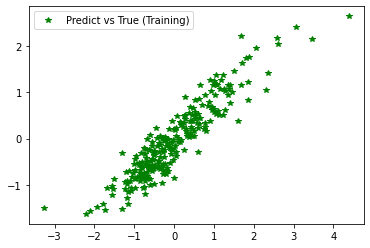

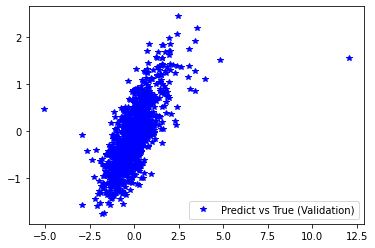


----------------------------------------------------------------------
----------------------Nodes: 15   Dropout: 0.15-----------------------
----------------------------------------------------------------------


C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



 ########## STATISTICS for Training Data ########## 

MSE             0.2818017006
CorrCoeff       0.9111329489

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5550766587
CorrCoeff       0.6777300126

 ##################################################


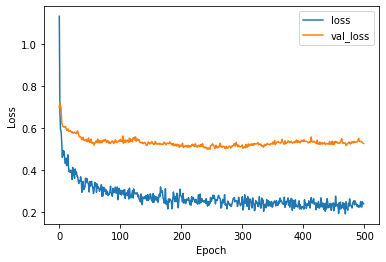

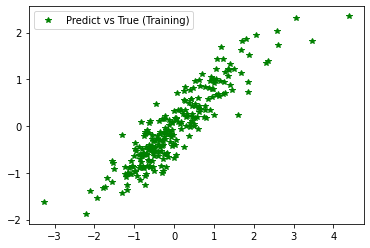

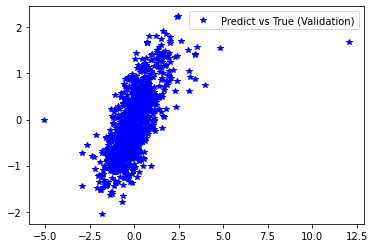


----------------------------------------------------------------------
-----------------------Nodes: 15   Dropout: 0.2-----------------------
----------------------------------------------------------------------


C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



 ########## STATISTICS for Training Data ########## 

MSE             0.3330362141
CorrCoeff       0.9081541457

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5777312517
CorrCoeff       0.6618652622

 ##################################################


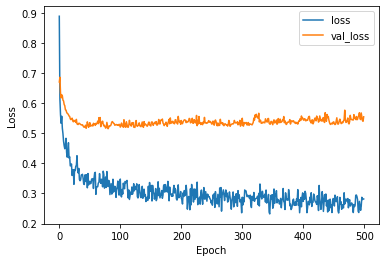

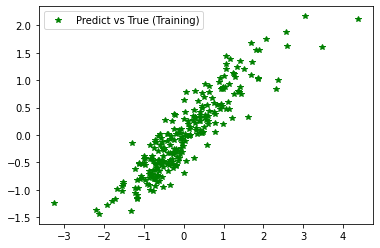

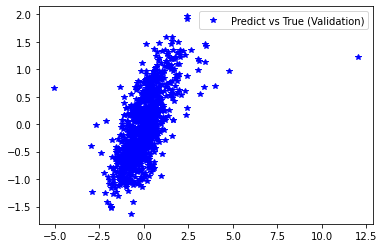


----------------------------------------------------------------------
----------------------Nodes: 15   Dropout: 0.25-----------------------
----------------------------------------------------------------------


C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



 ########## STATISTICS for Training Data ########## 

MSE             0.2935034633
CorrCoeff       0.8761271517

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5750743747
CorrCoeff       0.6617979337

 ##################################################


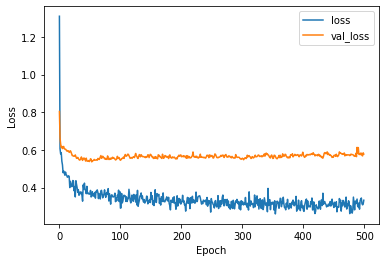

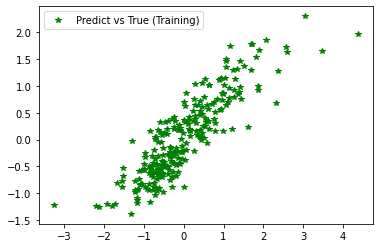

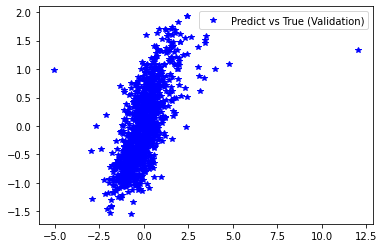


----------------------------------------------------------------------
-----------------------Nodes: 15   Dropout: 0.3-----------------------
----------------------------------------------------------------------


C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
  4%|▍         | 20/500 [05:05<2:02:01, 15.25s/epoch, loss=0.4, mse=0.4, val_loss=0.552, val_mse=0.552]












  3%|▎         | 16/500 [04:46<2:24:33, 17.92s/epoch, loss=0.395, mse=0.395, val_loss=0.587, val_mse=0.587]
100%|██████████| 5.00/5.00 [04:42<00:00, 56.5s/batch, loss=0.388, mse=0.388]
  0%|          | 0/500 [04:37<?, ?epoch/s]



 ########## STATISTICS for Training Data ########## 

MSE             0.3790256381
CorrCoeff       0.8593066290

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5819304585
CorrCoeff       0.6636328125

 ##################################################


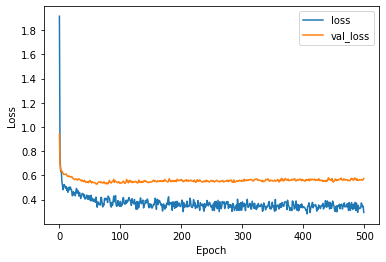

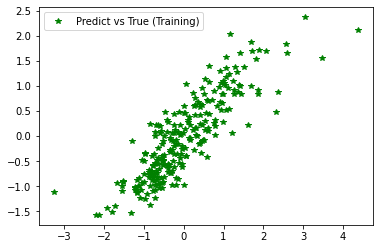

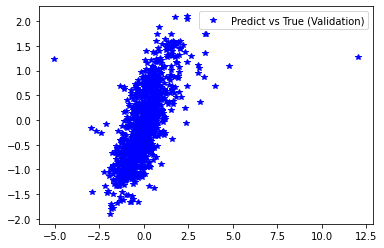


----------------------------------------------------------------------
----------------------Nodes: 15   Dropout: 0.35-----------------------
----------------------------------------------------------------------


C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



 ########## STATISTICS for Training Data ########## 

MSE             0.3844251931
CorrCoeff       0.8507390616

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5795137882
CorrCoeff       0.6583297130

 ##################################################


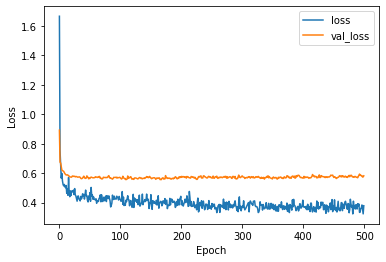

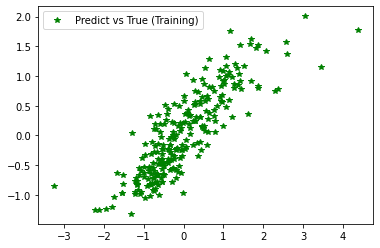

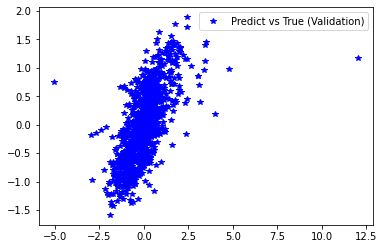


----------------------------------------------------------------------
-----------------------Nodes: 15   Dropout: 0.4-----------------------
----------------------------------------------------------------------


C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



 ########## STATISTICS for Training Data ########## 

MSE             0.4185166061
CorrCoeff       0.8312856208

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5894865990
CorrCoeff       0.6547485180

 ##################################################


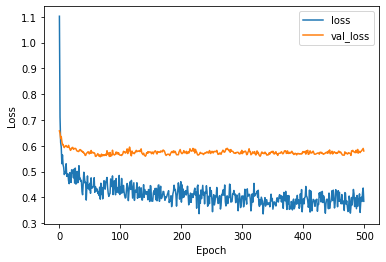

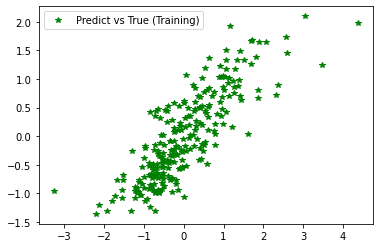

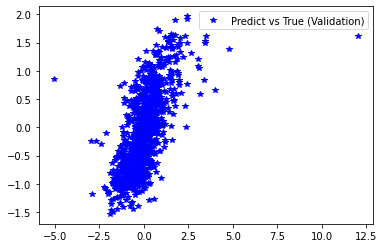


----------------------------------------------------------------------
----------------------Nodes: 15   Dropout: 0.45-----------------------
----------------------------------------------------------------------


C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



 ########## STATISTICS for Training Data ########## 

MSE             0.4451491237
CorrCoeff       0.8289374612

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.6053631306
CorrCoeff       0.6439810916

 ##################################################


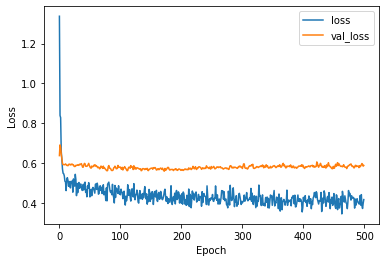

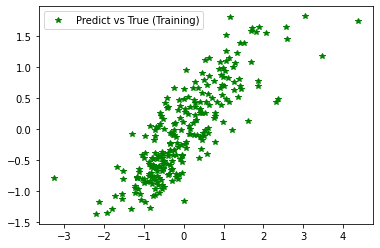

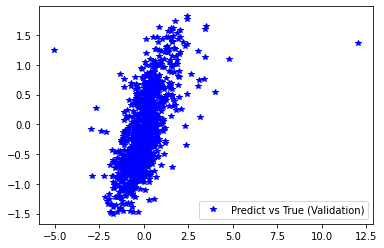


----------------------------------------------------------------------
-----------------------Nodes: 15   Dropout: 0.5-----------------------
----------------------------------------------------------------------


C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



 ########## STATISTICS for Training Data ########## 

MSE             0.4882080853
CorrCoeff       0.7924117035

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5908453465
CorrCoeff       0.6534178688

 ##################################################


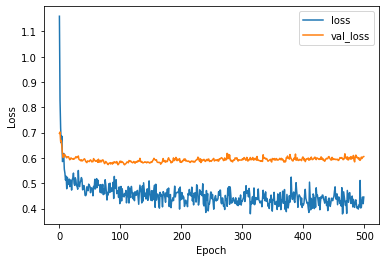

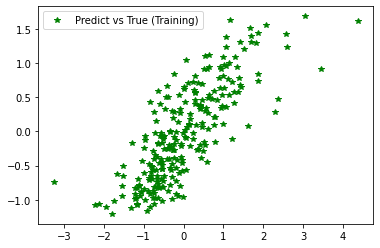

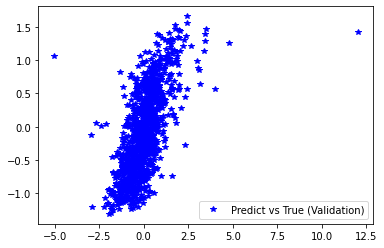


----------------------------------------------------------------------
-----------------------Nodes: 20   Dropout: 0.1-----------------------
----------------------------------------------------------------------


C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


KeyboardInterrupt: 

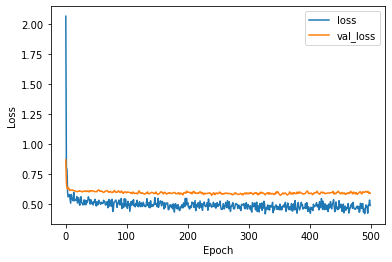

In [59]:
for no_nodes in [15, 20, 25, 30]:
    for drop in [0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:

        print("\n" + 70*"-" + 
        "\n{:-^70}\n".format('Nodes: ' + str(no_nodes) + "   Dropout: " + str(drop)) + 
        "-"*70)

        # Define the network, cost function and minimization method
        INPUT = {'inp_dim': x_trn.shape[1],         
                #  'n_nod': [25],                  
                'n_nod': [no_nodes],                  
                #  'drop_nod': 0.1,                
                'drop_nod': drop,                
                'act_fun': 'tanh',             
                'out_act_fun': 'linear',      
                'opt_method': 'Adam',         
                'cost_fun': 'mse',           
                'lr_rate': 0.025,            
                'metric': 'mse',              
                'lambd' : 0.0,             
                'num_out' : 1 }
                    
        # Get the model
        model_ex2 = mlp(**INPUT)

        # Print a summary of the model
        # model_ex2.summary()

        # callbacks = [
        #     keras.callbacks.ModelCheckpoint(
        #         filepath="q6_model.keras",
        #         save_best_only=True,
        #         monitor="val_mse")
        # ]
            
        # Train the model
        estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                            epochs = 500,                     
                            validation_data=(x_val,d_val),
                            batch_size=50,
                            # callbacks=[TqdmCallback(verbose=1)],                    
                            verbose = 0)



        # model_ex2 = keras.models.load_model("q5_model.keras")
        # Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
        pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
        pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
        stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
        stats_reg(d_val, pred_val, 'Validation', estimator_ex2)

        # Scatter plots of predicted and true values
        plt.figure()
        plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
        plt.legend()
        plt.figure()
        plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
        plt.legend()
        plt.show()


        # Training history
        plt.figure()
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        for k in ['loss', 'val_loss']:
            plt.plot(estimator_ex2.history[k], label = k) 
        plt.legend(loc='best')

##### Loop 2


----------------------------------------------------------------------
-----------------------Nodes: 20   Dropout: 0.1-----------------------
----------------------------------------------------------------------

 ########## STATISTICS for Training Data ########## 

MSE             0.2115818411
CorrCoeff       0.9443814122

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5779018998
CorrCoeff       0.6698189985

 ##################################################

----------------------------------------------------------------------
----------------------Nodes: 20   Dropout: 0.15-----------------------
----------------------------------------------------------------------

 ########## STATISTICS for Training Data ########## 

MSE             0.2614607811
CorrCoeff       0.9241960981

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE            

C:\Users\nilsb\AppData\Local\Temp/ipykernel_6972/61126961.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()



 ########## STATISTICS for Training Data ########## 

MSE             0.2709365785
CorrCoeff       0.9249195783

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5186086893
CorrCoeff       0.7024682519

 ##################################################

----------------------------------------------------------------------
-----------------------Nodes: 30   Dropout: 0.3-----------------------
----------------------------------------------------------------------

 ########## STATISTICS for Training Data ########## 

MSE             0.3305069804
CorrCoeff       0.9016714224

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5372664332
CorrCoeff       0.6911359981

 ##################################################

----------------------------------------------------------------------
----------------------Nodes: 30   Dropout: 0.3

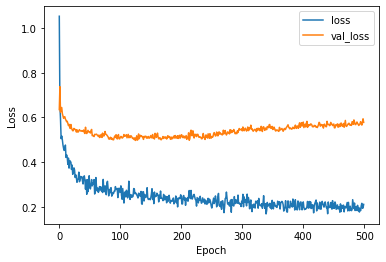

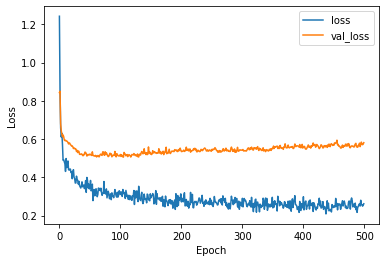

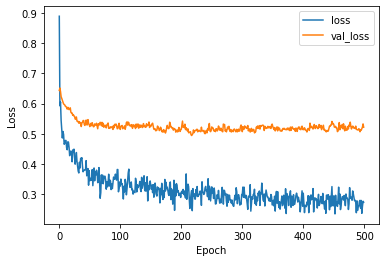

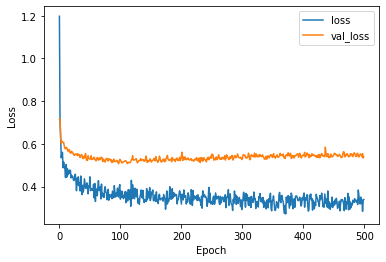

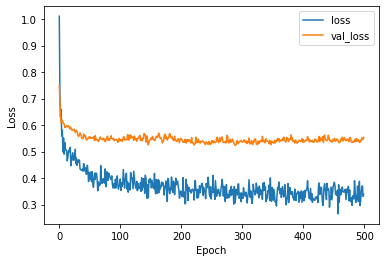

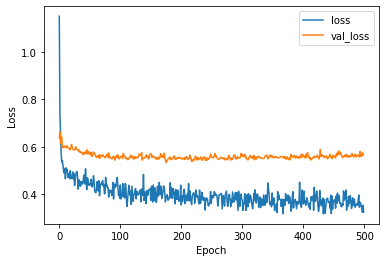

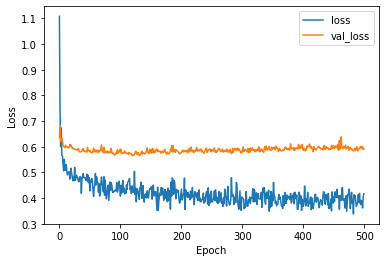

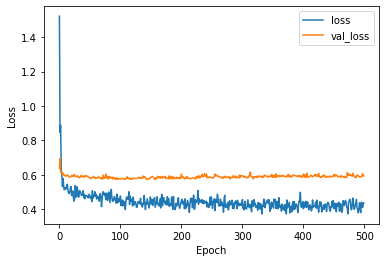

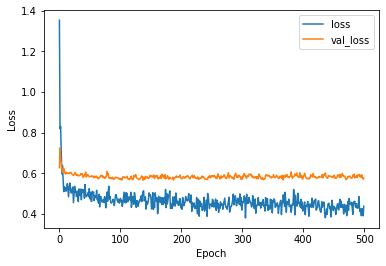

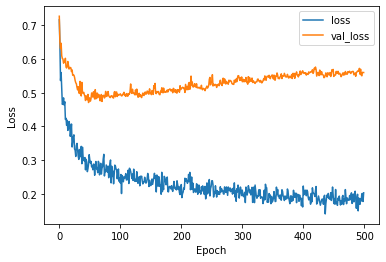

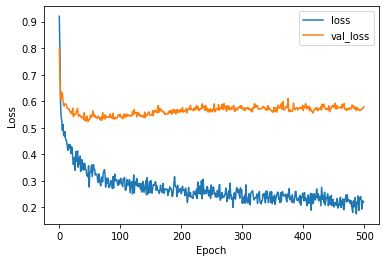

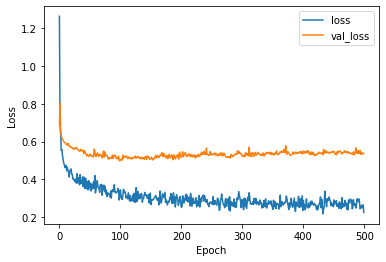

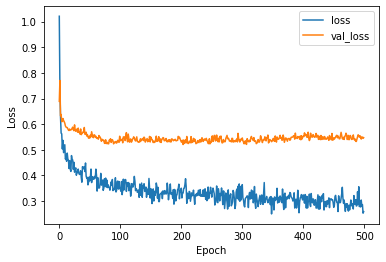

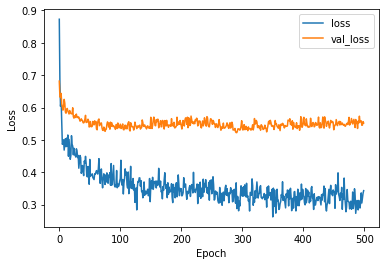

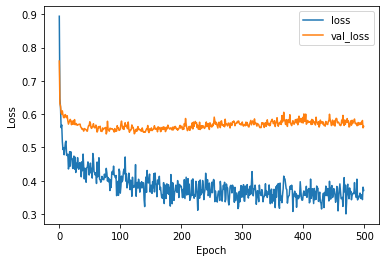

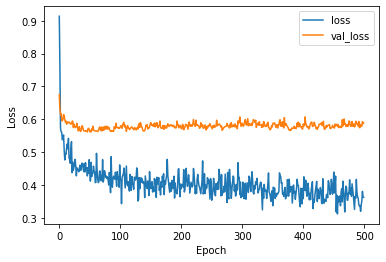

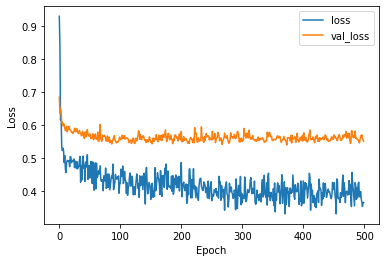

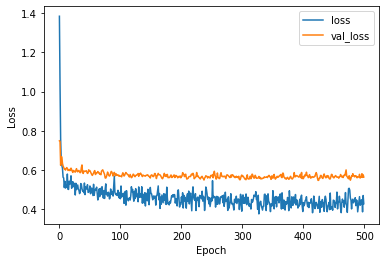

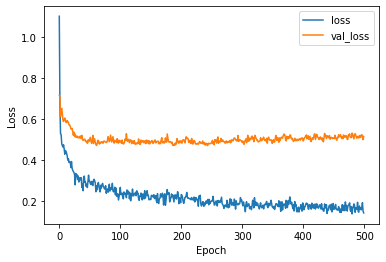

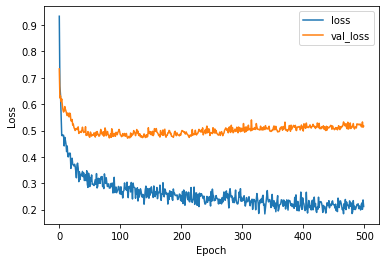

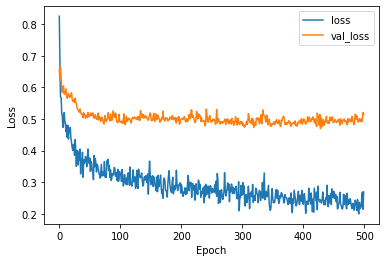

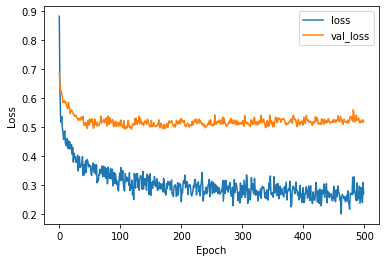

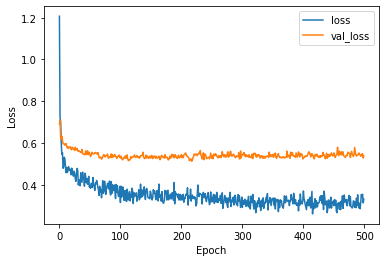

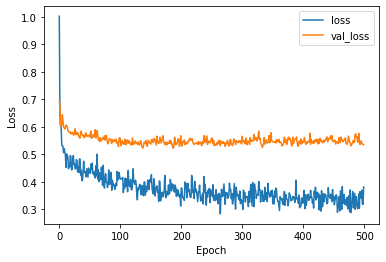

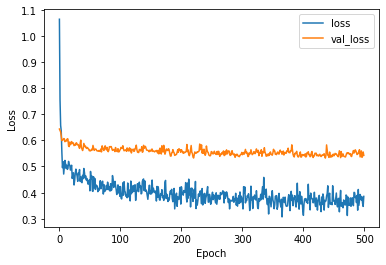

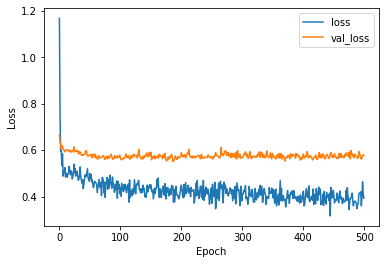

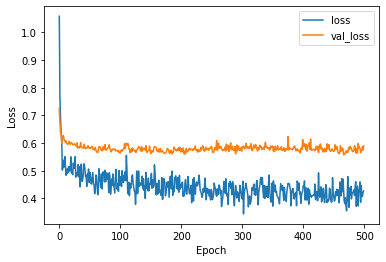

In [62]:
for no_nodes in [20, 25, 30]:
    for drop in [0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:

        print("\n" + 70*"-" + 
        "\n{:-^70}\n".format('Nodes: ' + str(no_nodes) + "   Dropout: " + str(drop)) + 
        "-"*70)

        # Define the network, cost function and minimization method
        INPUT = {'inp_dim': x_trn.shape[1],         
                #  'n_nod': [25],                  
                'n_nod': [no_nodes],                  
                #  'drop_nod': 0.1,                
                'drop_nod': drop,                
                'act_fun': 'tanh',             
                'out_act_fun': 'linear',      
                'opt_method': 'Adam',         
                'cost_fun': 'mse',           
                'lr_rate': 0.025,            
                'metric': 'mse',              
                'lambd' : 0.0,             
                'num_out' : 1 }
                    
        # Get the model
        model_ex2 = mlp(**INPUT)

        # Print a summary of the model
        # model_ex2.summary()

        # callbacks = [
        #     keras.callbacks.ModelCheckpoint(
        #         filepath="q6_model.keras",
        #         save_best_only=True,
        #         monitor="val_mse")
        # ]
            
        # Train the model
        estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                            epochs = 500,                     
                            validation_data=(x_val,d_val),
                            batch_size=50,
                            # callbacks=[TqdmCallback(verbose=1)],                    
                            callbacks=[],                    
                            verbose = 0)



        # model_ex2 = keras.models.load_model("q5_model.keras")
        # Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
        pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
        pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
        stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
        stats_reg(d_val, pred_val, 'Validation', estimator_ex2)

        # Scatter plots of predicted and true values
        # plt.figure()
        # plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
        # plt.legend()
        # plt.figure()
        # plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
        # plt.legend()
        # plt.show()


        # Training history
        plt.figure()
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        for k in ['loss', 'val_loss']:
            plt.plot(estimator_ex2.history[k], label = k) 
        plt.legend(loc='best')

##### Loop 3


-----------------------Nodes: 30   Dropout: 0.1-----------------------


 ########## STATISTICS for Validation Data ########## 

MSE             0.5960753560
CorrCoeff       0.6484604220

 ##################################################


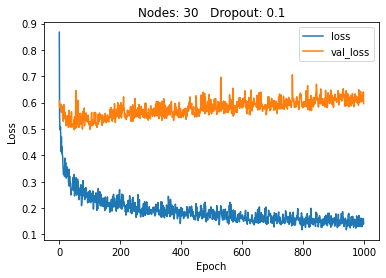


-----------------------Nodes: 30   Dropout: 0.1-----------------------



KeyboardInterrupt: 

In [92]:
no_nodes = 30
for drop in [0.1]:#, 0.15, 0.2, 0.25]:
    for i in range(3):

        # print("\n" + 70*"-" + 
        # "\n{:-^70}\n".format('Nodes: ' + str(no_nodes) + "   Dropout: " + str(drop)) + 
        # "-"*70)

        print("\n{:-^70}\n".format('Nodes: ' + str(no_nodes) + "   Dropout: " + str(drop)))

        # Define the network, cost function and minimization method
        INPUT = {'inp_dim': x_trn.shape[1],         
                #  'n_nod': [30],                  
                'n_nod': [no_nodes],                  
                #  'drop_nod': 0.1,                
                'drop_nod': drop,                
                'act_fun': 'tanh',             
                'out_act_fun': 'linear',      
                'opt_method': 'Adam',         
                'cost_fun': 'mse',           
                'lr_rate': 0.025,            
                'metric': 'mse',              
                'lambd' : 0.0,             
                'num_out' : 1 }
                    
        # Get the model
        model_ex2 = mlp(**INPUT)

        # Print a summary of the model
        # model_ex2.summary()
            
        # Train the model
        estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                            epochs = 1000,                     
                            validation_data=(x_val,d_val),
                            batch_size=16,
                            # callbacks=[TqdmCallback(verbose=1)],                    
                            # callbacks=[],                    
                            verbose = 0)



        # model_ex2 = keras.models.load_model("q5_model.keras")
        # Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
        # pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
        pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
        # stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
        stats_reg(d_val, pred_val, 'Validation', estimator_ex2)

    # Scatter plots of predicted and true values
        # plt.figure()
        # plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
        # plt.legend()
        # plt.figure()
        # plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
        # plt.legend()
        # plt.show()


        # Training history
        plt.figure()
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        for k in ['loss', 'val_loss']:
            plt.plot(estimator_ex2.history[k], label = k) 
        plt.legend(loc='best')
        plt.title('Nodes: ' + str(no_nodes) + "   Dropout: " + str(drop))
        plt.show()

### CellName: Ex3 (#10)
### CellType: Exercise
### Cell instruction: Instruction for question 7-8

For this exercise you are given a classification problem with a fixed training-, validation- and test dataset. The data is the Japanse vowels dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We provide less code here, normalization of the input data and the definition of the MLP is missing. You need to provide that on your own.

#### Question 7
**Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.**

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
This problem is a 9-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

#### Question 8
The typical goal is to have a high accuracy (i.e. the fraction of correctly classified cases). During training we typically monitor possible overtraining by looking at the *loss* of the validation data, since this is the error used during training. One can however have a situation where the loss increases for the validation data but the accuracy stays constant (**why?**). **Given this situation, what would be your criteria to select the best model?** 


In [136]:
%%time

# Load the data
x_trn, d_trn, x_val, d_val, x_tst, d_tst = vowels()

# # YOUR CODE FOR NORMALIZATION
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std
x_tst = (x_tst - mu)/std

num_classes = 9

# YOUR CODE THAT DEFINES THE MLP
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [15],                  
         'drop_nod': [0],                
         'act_fun': 'relu',             
         'out_act_fun': 'softmax',      
         'opt_method': 'Adam',         
         'cost_fun': 'categorical_crossentropy',           
         'lr_rate': 0.025,            
         'metric': 'accuracy',              
         'lambd' : 0.01,             
         'num_out' : num_classes }    

# Get the model
model_vowels = mlp(**INPUT)

# Print a summary of the model
model_vowels.summary()

# Train the model
estimator_vowels = model_vowels.fit(x_trn, d_trn,
                      epochs = 500,     
                      validation_data=(x_val,d_val),
                      batch_size=100,   
                      callbacks=[TqdmCallback(verbose=1)],        
                      verbose = 0)




Model: "model_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 12)]              0         
                                                                 
 dense_248 (Dense)           (None, 15)                195       
                                                                 
 dropout_124 (Dropout)       (None, 15)                0         
                                                                 
 dense_249 (Dense)           (None, 9)                 144       
                                                                 
Total params: 339
Trainable params: 339
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 500/500 [03:44<00:00,  2.23epoch/s, loss=0.181, accuracy=0.959, val_loss=0.427, val_accuracy=0.911]

Wall time: 3min 45s


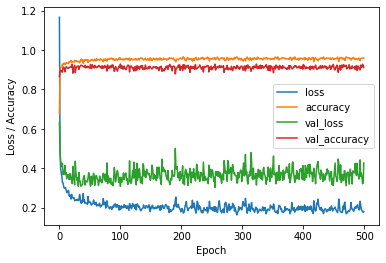


 ########## Result for Training data ########## 

log_loss:    0.1510
accuracy:    0.9448 

              precision    recall  f1-score   support

     class 1       0.95      0.98      0.96       542
     class 2       0.93      0.94      0.93       465
     class 3       0.93      0.98      0.96       424
     class 4       0.97      0.95      0.96       606
     class 5       0.95      0.87      0.90       397
     class 6       0.96      0.99      0.98       523
     class 7       0.99      0.96      0.98       506
     class 8       0.90      0.84      0.87       377
     class 9       0.91      0.95      0.93       434

    accuracy                           0.94      4274
   macro avg       0.94      0.94      0.94      4274
weighted avg       0.94      0.94      0.94      4274



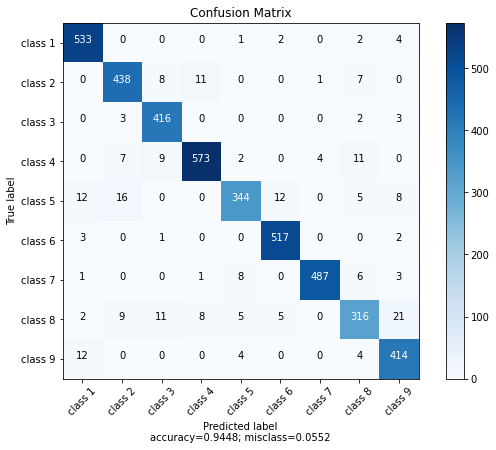


 ########## Result for Validation data ########## 

log_loss:    0.3588
accuracy:    0.9112 

              precision    recall  f1-score   support

     class 1       0.96      0.94      0.95       214
     class 2       0.83      0.86      0.85       203
     class 3       0.93      0.94      0.94       467
     class 4       0.97      0.93      0.95       365
     class 5       0.83      0.87      0.85       158
     class 6       0.92      0.97      0.95       169
     class 7       0.97      0.91      0.94       281
     class 8       0.87      0.84      0.86       264
     class 9       0.80      0.88      0.84       154

    accuracy                           0.91      2275
   macro avg       0.90      0.91      0.90      2275
weighted avg       0.91      0.91      0.91      2275



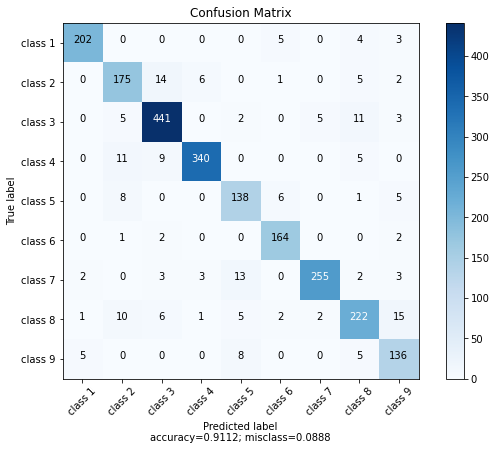


 ########## Result for Test data ########## 

log_loss:    0.3710
accuracy:    0.9080 

              precision    recall  f1-score   support

     class 1       0.96      0.94      0.95       340
     class 2       0.84      0.87      0.85       323
     class 3       0.92      0.93      0.93       723
     class 4       0.97      0.92      0.95       502
     class 5       0.87      0.81      0.84       227
     class 6       0.88      0.99      0.94       271
     class 7       0.98      0.93      0.96       383
     class 8       0.82      0.82      0.82       370
     class 9       0.87      0.90      0.88       273

    accuracy                           0.91      3412
   macro avg       0.90      0.90      0.90      3412
weighted avg       0.91      0.91      0.91      3412



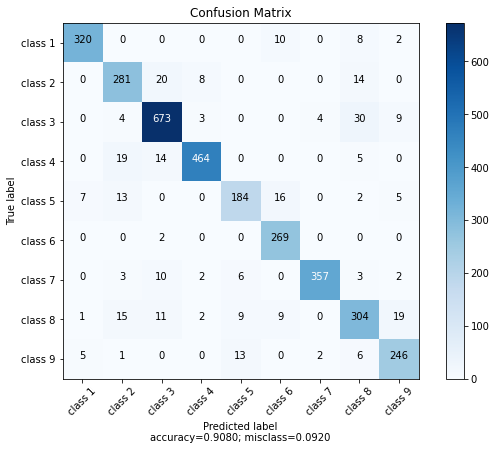

In [137]:

# Plot the learning curves
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_vowels.history.keys():
    plt.plot(estimator_vowels.history[k], label = k) 
plt.legend()
plt.show()

# plot the confusion matrix
make_cm_plot(model_vowels, x_trn, d_trn, num_classes, 'Training data')
make_cm_plot(model_vowels, x_val, d_val, num_classes, 'Validation data')
make_cm_plot(model_vowels, x_tst, d_tst, num_classes, 'Test data')

### KFold and other goodies
GÖR KLART RESTEN AV LABBEN FÖRST!!!

In [245]:
%%time

# Load the data
x_trn, d_trn, x_val, d_val, x_tst, d_tst = vowels()

# # YOUR CODE FOR NORMALIZATION
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std
x_tst = (x_tst - mu)/std

num_classes = 9


# YOUR CODE THAT DEFINES THE MLP
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [40, 15],                  
         'drop_nod': [0.1, 0.25],                
         'act_fun': 'relu',             
         'out_act_fun': 'softmax',      
         'opt_method': 'Adam',         
         'cost_fun': 'categorical_crossentropy',           
         'lr_rate': 0.1,            
         'metric': 'accuracy',              
         'lambd' : 0.01,             
         'num_out' : num_classes }    

# Merge inputs and targets
inputs = np.concatenate((x_trn, x_val), axis=0)
targets = np.concatenate((d_trn, d_val), axis=0)

# Score containers for folds
acc_per_fold = []
loss_per_fold = []

# Fold parameters
batch_size = 50
nbr_epochs = 50
verbosity = 0
nbr_folds = 5

kfold = KFold(n_splits=nbr_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_n = 1
for train, test in kfold.split(inputs, targets):

  k_model = mlp(**INPUT)

  # Fit data to model
  history = k_model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=nbr_epochs,
              callbacks=[TqdmCallback(verbose=1)], 
              verbose=verbosity)

  # Generate generalization metrics
  scores = k_model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_n}: {k_model.metrics_names[0]} of {scores[0]}; {k_model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_n = fold_n + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')




# Get the model
model_vowels = mlp(**INPUT)

# Print a summary of the model
model_vowels.summary()

# Train the model
estimator_vowels = model_vowels.fit(x_trn, d_trn,
                      epochs = 500,     
                      validation_data=(x_val,d_val),
                      batch_size=100,   
                    #   callbacks=[TqdmCallback(verbose=1)],        
                      verbose = 0)




SyntaxError: invalid syntax (<unknown>, line 15)

In [241]:
x_trn.shape[1]

12

### CellName: Ex4 (#11)
### CellType: Exercise
### Cell instruction: Instruction for question 9

For this exercise you are given a classification problem with a fixed training and test dataset. The data is the Bioconcentraion dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We do not provide any python code for this question, only the small part that reads the data (next code cell).

#### Question 9
**(a) Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.** For this classification task there are not so many cases of class 2. In the training data there is: class 1: 345 cases, class 2: 48 cases, and class 3: 191 cases. One can end upp with situations that the network does not at all learn how to detect cases of class 2. **(b) What performance measure(s) do you think is(are) relevant when you select the optimal model for this problem?**  

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
Since there is no defined validation data set you need to split your original training data into training and validation data. You can use *sklearn.model_selection.train_test_split* or *sklearn.model_selection.KFold* to accomplish that, where the latter method does k-fold crossvalidation splits.

**Hint 3:** 
This problem is a 3-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).


In [318]:
d_tst.shape
x_trn.shape[1]

9

In [2]:

# from imblearn.over_sampling import SMOTE

# seed = 0 means random, seed > 0 means fixed
seed = 1
np.random.seed(seed) if seed else None

# Load Bioconcentration training and test data
x_trn, d_trn, x_tst, d_tst = bcf()
num_classes = d_tst.shape[1]
inp_dim = x_trn.shape[1]

mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_tst = (x_tst - mu)/std
# YOUR CODE HERE

x_trn, x_val, d_trn, d_val = train_test_split(x_trn, d_trn, test_size=0.1) 

INPUT = {'inp_dim': inp_dim,         
         'n_nod': [inp_dim-num_classes],                  
         'drop_nod': [0],                
         'act_fun': 'relu',             
         'out_act_fun': 'softmax',      
         'opt_method': 'Adam',         
         'cost_fun': 'categorical_crossentropy',           
         'lr_rate': 0.025,            
         'metric': 'accuracy',              
         'lambd' : 0.01,             
         'num_out' : num_classes }    

# # Get the model
    # model = mlp(**INPUT)

    # # Print a summary of the model
    # model.summary()

    # callbacks = [
    #     keras.callbacks.ModelCheckpoint(
    #         filepath="q9_model.keras",
    #         save_best_only=True,
    #         monitor="accuracy")
    # ]
        
    # # Train the model
    # history = model.fit(x_trn, d_trn,
    #                       epochs = 50,                     
    #                       validation_data=(x_val,d_val),
    #                       batch_size=50,
    #                       callbacks=[TqdmCallback(verbose=1), callbacks],                    
    #                       verbose = 0)

    # test_model = keras.models.load_model("q9_model.keras")



# Merge inputs and targets
inputs = np.concatenate((x_trn, x_val), axis=0)
targets = np.concatenate((d_trn, d_val), axis=0)

# Score containers for folds
acc_per_fold = []
loss_per_fold = []

# Fold parameters
batch_size = 50
nbr_epochs = 50
verbosity = 0
nbr_folds = 10

k_callbacks = 

kfold = KFold(n_splits=nbr_folds, shuffle=True)
# K-fold Cross Validation model evaluation
fold_n = 1
for train, test in kfold.split(inputs, targets):

    k_model = mlp(**INPUT)

    # Fit data to model
    history = k_model.fit(inputs[train], targets[train],
                batch_size=batch_size,
                epochs=nbr_epochs,
                callbacks=[TqdmCallback(verbose=1), k_callbacks], 
                verbose=verbosity)

    # Generate generalization metrics
    scores = k_model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_n}: {k_model.metrics_names[0]} of {scores[0]}; {k_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_n = fold_n + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')




# # Get the model
# model = mlp(**INPUT)

# # Print a summary of the model
# model.summary()

# # Train the model
# history = model.fit(x_trn, d_trn,
#                       epochs = 500,     
#                       validation_data=(x_val,d_val),
#                       batch_size=100,   
#                     #   callbacks=[TqdmCallback(verbose=1), callbacks],        
#                       verbose = 0)




# # plot the confusion matrix
# make_cm_plot(test_model, x_trn, d_trn, num_classes, 'Training data')
# make_cm_plot(test_model, x_val, d_val, num_classes, 'Validation data')
# make_cm_plot(test_model, x_tst, d_tst, num_classes, 'Test data')

SyntaxError: invalid syntax (Temp/ipykernel_21412/1269820745.py, line 70)

### CellName: Ex5 (#12)
### CellType: Exercise
### Cell instruction: Instruction for question 10

For this exercise the task is to train a binary classifier for the spiral problem. The aim is to get *zero* classification error for the training data (there is no test or validation data) with as small as possible model, in terms of the number of trainable weights. Also plot the boundary to see if it resembles a spriral. To pass this question you should at least try! The data is randomly generated and I suggest at least 1000 data points to get "good" spirals.

#### Question 10
**Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model. Report the model you used.**

In [ ]:
def spiral_mlp(inp_dim,
            n_nod,
            drop_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            metric = 'accuracy',
            lambd = 0.0, 
            num_out = None):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for i, nod in enumerate(n_nod):
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        if type(drop_nod) is list: 
            X = Dropout(drop_nod[i])(X)
        else: 
            X = Dropout(drop_nod)(X)
        
    output = Dense(num_out, activation = out_act_fun )(X)
    
    method = getattr(optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(lr = lr_rate),
                  loss = cost_fun,
                  metrics=[metric])       
    
    return model

In [213]:
from tensorflow.keras.models import Sequential
mymlp = Sequential()
mymlp.add(Dense(12, input_dim=2, activation='tanh'))
mymlp.add(Dense(12, input_dim=2, activation='tanh'))
mymlp.add(Dense(1, activation='sigmoid'))

mymlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

mymlp.summary()

# mymlp.fit(x_trn, d_trn, epochs=2000, batch_size=100,  callbacks = TqdmCallback(verbose=1),verbose=0)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 12)                36        
                                                                 
 dense_99 (Dense)            (None, 12)                156       
                                                                 
 dense_100 (Dense)           (None, 1)                 13        
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


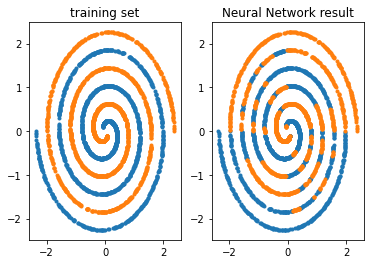

In [184]:
X_test, y_test = x_trn, d_trn

yy = np.round(mymlp.predict(X_test).T[0])

plt.subplot(1,2,1)
plt.title('Actual')
plt.plot(x_trn[d_trn==0,0], x_trn[d_trn==0,1], '.')
plt.plot(x_trn[d_trn==1,0], x_trn[d_trn==1,1], '.')
plt.subplot(1,2,2)
plt.title('Prediction')
plt.plot(X_test[yy==0,0], X_test[yy==0,1], '.')
plt.plot(X_test[yy==1,0], X_test[yy==1,1], '.')
plt.show()

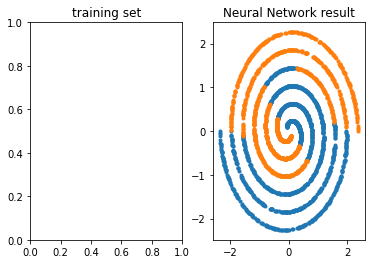

In [181]:
X_test, y_test = x_trn, d_trn

yy = np.round(mymlp.predict(X_test).T[0])

plt.subplot(1,2,1)
plt.title('training set')
# plt.plot(X[y==0,0], X[y==0,1], '.')
# plt.plot(X[y==1,0], X[y==1,1], '.')
plt.subplot(1,2,2)
plt.title('Neural Network result')
plt.plot(X_test[yy==0,0], X_test[yy==0,1], '.')
plt.plot(X_test[yy==1,0], X_test[yy==1,1], '.')
plt.show()

C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_101 (Dense)           (None, 12)                36        
                                                                 
 dropout_66 (Dropout)        (None, 12)                0         
                                                                 
 dense_102 (Dense)           (None, 12)                156       
                                                                 
 dropout_67 (Dropout)        (None, 12)                0         
                                                                 
 dense_103 (Dense)           (None, 1)                 13        
                                                                 
Total params: 205
Trainable params: 205
Non-trainable para

100%|██████████| 3000/3000 [13:03<00:00,  3.83epoch/s, loss=1.04, accuracy=0.498] 



 ########## STATISTICS for Training Data ########## 

Accuracy        0.5000
Sensitivity     1.0000
Specificity     0.0000
Loss            0.7527

 ##################################################


C:\Users\nilsb\AppData\Local\Temp/ipykernel_18120/5010088.py:26: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, cmap=plt.cm.Paired)


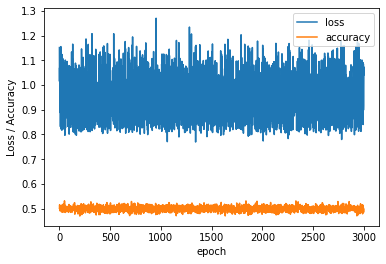

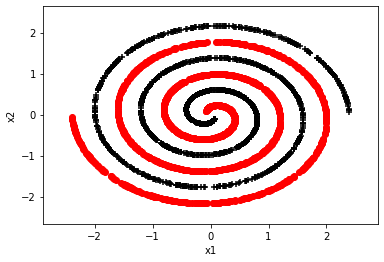

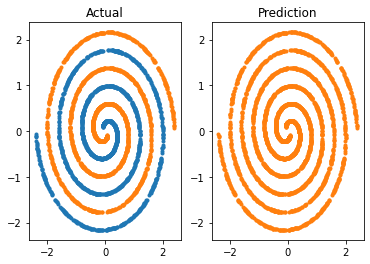

Wall time: 13min 9s


In [214]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 1
np.random.seed(seed) if seed else None
    
# Generate training data
x_trn, d_trn = twospirals(1500, 3, 0)

mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std

# asdf = np.append(x_trn,x_trn**2,axis=1)
# asdf = np.append(asdf,np.array([x_trn[:,0]*x_trn[:,1]]).T,axis=1)
# asdf

# mu, std = standard(asdf)
# asdf = (asdf - mu)/std
# asdf

# x_trn = asdf

INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [12, 12],                  
         'drop_nod': 0,                
         'act_fun': 'tanh',             
         'out_act_fun': 'sigmoid',      
         'opt_method': 'RMSprop',         
         'cost_fun': 'binary_crossentropy',           
         'lr_rate': 0.2,            
         'metric': 'accuracy',              
         'lambd' : 0.1,             
         'num_out' : 1 }                 

# Get the model
model_ex6 = mlp(**INPUT)

# Print a summary of the model
model_ex6.summary()

# Train the model
estimator_ex6 = model_ex6.fit(x_trn, d_trn,
                      epochs = 3000,                
                      batch_size=100,
                      callbacks=[TqdmCallback(verbose=1)],                   
                      verbose = 0)

# Call the stats function to print out statistics for the training
stats_class(x_trn, d_trn, 'Training', model_ex6)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
for k in estimator_ex6.history.keys():
    plt.plot(estimator_ex6.history[k], label = k) 
plt.legend(loc='best')

# Show the decision boundary
decision_b(x_trn, d_trn, model_ex6)

yy = np.round(model_ex6.predict(x_trn).T[0])

plt.subplot(1,2,1)
plt.title('Actual')
plt.plot(x_trn[d_trn==0,0], x_trn[d_trn==0,1], '.')
plt.plot(x_trn[d_trn==1,0], x_trn[d_trn==1,1], '.')
plt.subplot(1,2,2)
plt.title('Prediction')
plt.plot(x_trn[yy==0,0], x_trn[yy==0,1], '.')
plt.plot(x_trn[yy==1,0], x_trn[yy==1,1], '.')
plt.show()


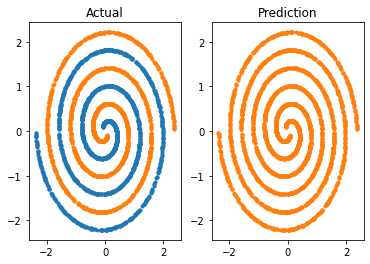

In [192]:
yy = np.round(model_ex6.predict(x_trn).T[0])

plt.subplot(1,2,1)
plt.title('Actual')
plt.plot(x_trn[d_trn==0,0], x_trn[d_trn==0,1], '.')
plt.plot(x_trn[d_trn==1,0], x_trn[d_trn==1,1], '.')
plt.subplot(1,2,2)
plt.title('Prediction')
plt.plot(x_trn[yy==0,0], x_trn[yy==0,1], '.')
plt.plot(x_trn[yy==1,0], x_trn[yy==1,1], '.')
plt.show()

In [210]:
pred_lol = [1 if i[0]>0.5 else 0 for i in model_ex6.predict(x_trn)]

class Model_test():
    def __init__(self, model):
        self.model = model
    def predict(data, data2):
        return  np.round(model_ex6.predict(data, data2).T[0])

model_test = Model_test(model_ex6)
model_test.predict(x_trn)

# np.round(model_ex6.predict(x_trn).T[0])

ValueError: Failed to find data adapter that can handle input: <class '__main__.Model_test'>, <class 'NoneType'>

ValueError: y must be an integer array. Found float64. Try passing the array as y.astype(np.int_)

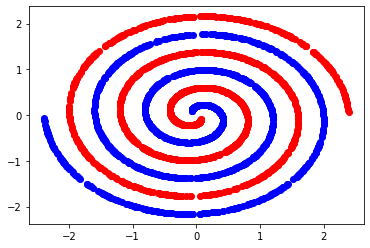

In [196]:
from mlxtend.plotting import plot_decision_regions
plt.figure()
plt.scatter(x_trn[:, 0][d_trn==1], x_trn[:, 1][d_trn==1], marker='o', c='r')
plt.scatter(x_trn[:, 0][d_trn==0], x_trn[:, 1][d_trn==0], marker='o', c='b')
plot_decision_regions(x_trn, d_trn, clf=mymlp, legend=2)

With some feature engineering...

In [17]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None
    
# Generate training data
x_trn, d_trn = twospirals(1500, 3, 0)

# x_trn[]

Wall time: 0 ns


array([ 1.56610255, 14.16097551])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_27 (Dense)            (None, 10)                30        
                                                                 
 dropout_21 (Dropout)        (None, 10)                0         
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dropout_22 (Dropout)        (None, 10)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dropout_23 (Dropout)        (None, 10)                0   

100%|██████████| 200/200 [01:05<00:00,  3.04epoch/s, loss=0.693, accuracy=0.49] 



 ########## STATISTICS for Training Data ########## 

Accuracy        0.5000
Sensitivity     1.0000
Specificity     0.0000
Loss            0.6931

 ##################################################


C:\Users\nilsb\AppData\Local\Temp/ipykernel_18120/5010088.py:26: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, cmap=plt.cm.Paired)


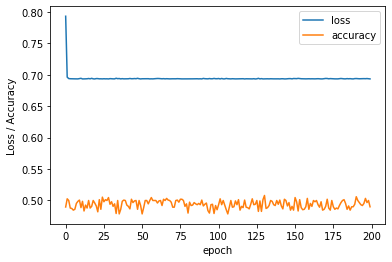

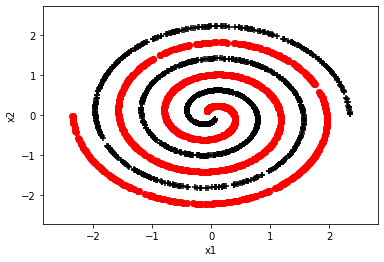

In [17]:
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std

INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [10, 10, 10, 10, 4],                  
         'drop_nod': 0.4,                
         'act_fun': 'relu',             
         'out_act_fun': 'sigmoid',      
         'opt_method': 'Adam',         
         'cost_fun': 'binary_crossentropy',           
         'lr_rate': 0.025,            
         'metric': 'accuracy',              
         'lambd' : 0.01,             
         'num_out' : 1 }                 

# Get the model
model_ex6 = mlp(**INPUT)

# Print a summary of the model
model_ex6.summary()

# Train the model
estimator_ex6 = model_ex6.fit(x_trn, d_trn,
                      epochs = 200,                
                      batch_size=100,
                      callbacks=[TqdmCallback(verbose=1)],                   
                      verbose = 0)

# Call the stats function to print out statistics for the training
stats_class(x_trn, d_trn, 'Training', model_ex6)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
for k in estimator_ex6.history.keys():
    plt.plot(estimator_ex6.history[k], label = k) 
plt.legend(loc='best')

# Show the decision boundary
decision_b(x_trn, d_trn, model_ex6)

##### V2

In [218]:
def mlp_spiral_test(inp_dim,
            n_nod,
            drop_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            metric = 'accuracy',
            lambd = 0.0, 
            num_out = None):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for i, nod in enumerate(n_nod):
        X = Dense(nod, 
                  # activation = act_fun)(X)
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        # if type(drop_nod) is list: 
        #     X = Dropout(drop_nod[i])(X)
        # else: 
        #     X = Dropout(drop_nod)(X)
        
    output = Dense(num_out, activation = out_act_fun )(X)
    
    method = getattr(optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(lr = lr_rate),
                  loss = cost_fun,
                  metrics=[metric])       
    
    return model

In [240]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None
    
# Generate training data
x_trn, d_trn = twospirals(1500, 3, 0)

mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std

# Define the network, cost function and minimization method
# INPUT = {'inp_dim': x_trn.shape[1],         
#          'n_nod': [12, 12],              
#          'drop_nod': 0.0,                 
#          'act_fun': 'tanh',                 
#          'out_act_fun': 'sigmoid',          
#          'opt_method': 'RMSprop',             
#          'cost_fun': 'binary_crossentropy', 
#          'lr_rate': 0.01,                 
#          'num_out' : 1 }                   

# INPUT = {'inp_dim': x_trn.shape[1],         
#          'n_nod': [24, 18, 12, 6],              
#          'drop_nod': 0.0,                 
#          'act_fun': 'tanh',                 
#          'out_act_fun': 'sigmoid',          
#          'opt_method': 'RMSprop',             
#          'cost_fun': 'binary_crossentropy', 
#          'lr_rate': 0.001,                 
#          'num_out' : 1 }                   

# INPUT = {'inp_dim': x_trn.shape[1],         
#          'n_nod': [12, 12, 12],              
#          'drop_nod': 0.0,                 
#          'act_fun': 'tanh',                 
#          'out_act_fun': 'sigmoid',          
#          'opt_method': 'RMSprop',             
#          'cost_fun': 'binary_crossentropy', 
#          'lr_rate': 0.001,                 
#          'num_out' : 1 }                   

INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [20, 20],              
         'drop_nod': 0.0,                 
         'act_fun': 'tanh',                 
         'out_act_fun': 'sigmoid',          
         'opt_method': 'RMSprop',             
         'cost_fun': 'binary_crossentropy', 
         'lr_rate': 0.001,                 
         'num_out' : 1 }                   


# Get the model
model_ex6 = mlp(**INPUT)

# Print a summary of the model
model_ex6.summary()

# Train the model
estimator_ex6 = model_ex6.fit(x_trn, d_trn,
                      epochs = 1000,                
                      batch_size=100,
                    #   callbacks=[TqdmCallback(verbose=1)], 
                      verbose = 1)

C:\Users\nilsb\anaconda3\envs\tf.gpu\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_169 (Dense)           (None, 20)                60        
                                                                 
 dropout_82 (Dropout)        (None, 20)                0         
                                                                 
 dense_170 (Dense)           (None, 20)                420       
                                                                 
 dropout_83 (Dropout)        (None, 20)                0         
                                                                 
 dense_171 (Dense)           (None, 1)                 21        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable para


 ########## STATISTICS for Training Data ########## 

Accuracy        0.5230
Sensitivity     0.4867
Specificity     0.5593
Loss            0.6638

 ##################################################


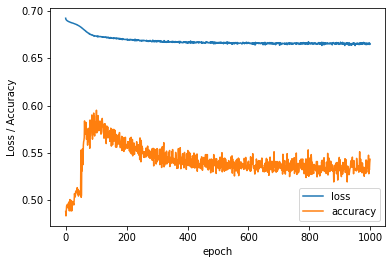

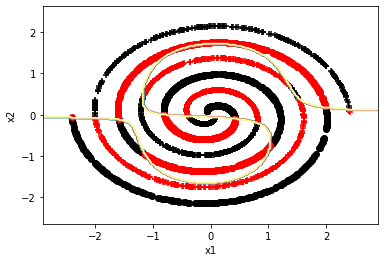

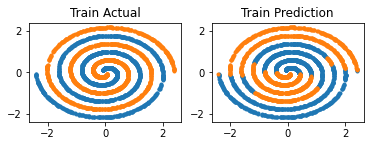

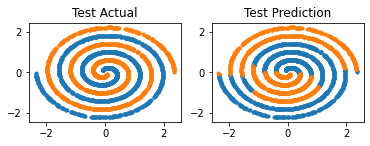

In [239]:
# Call the stats function to print out statistics for the training
stats_class(x_trn, d_trn, 'Training', model_ex6)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
for k in estimator_ex6.history.keys():
    plt.plot(estimator_ex6.history[k], label = k) 
plt.legend(loc='best')

# Show the decision boundary
decision_b(x_trn, d_trn, model_ex6)

x_tst, d_tst = twospirals(1500, 3, 0)
mu, std = standard(x_tst)
x_tst = (x_tst - mu)/std

pred_trn = np.round(model_ex6.predict(x_trn).T[0])
pred_tst = np.round(model_ex6.predict(x_tst).T[0])

#Plot actual and predicted classification for training and another test set
plt.subplot(2,2,1)
plt.title('Train Actual')
plt.plot(x_trn[d_trn==0,0], x_trn[d_trn==0,1], '.')
plt.plot(x_trn[d_trn==1,0], x_trn[d_trn==1,1], '.')
plt.subplot(2,2,2)
plt.title('Train Prediction')
plt.plot(x_trn[pred_trn==0,0], x_trn[pred_trn==0,1], '.')
plt.plot(x_trn[pred_trn==1,0], x_trn[pred_trn==1,1], '.')
plt.show()
plt.subplot(2,2,3)
plt.title('Test Actual')
plt.plot(x_tst[d_tst==0,0], x_tst[d_tst==0,1], '.')
plt.plot(x_tst[d_tst==1,0], x_tst[d_tst==1,1], '.')
plt.subplot(2,2,4)
plt.title('Test Prediction')
plt.plot(x_tst[pred_tst==0,0], x_tst[pred_tst==0,1], '.')
plt.plot(x_tst[pred_tst==1,0], x_tst[pred_tst==1,1], '.')
plt.show()

* 

In [126]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 1
np.random.seed(seed) if seed else None
    
# Generate training data
x_trn, d_trn = twospirals(1500, 3, 0)

# mu, std = standard(x_trn)
# x_trn = (x_trn - mu)/std

asdf = np.append(x_trn,x_trn**2,axis=1)
asdf = np.append(asdf,np.array([x_trn[:,0]*x_trn[:,1]]).T,axis=1)
asdf

mu, std = standard(asdf)
asdf = (asdf - mu)/std
asdf



Wall time: 3.99 ms


array([[ 0.56414413,  0.89217508, -0.54243454, -0.16724106,  0.45140888],
       [-0.51265534,  1.65381077, -0.58654841,  1.42227797, -1.00103179],
       [-0.07034459,  0.09558811, -0.79172305, -0.81222441, -0.09686622],
       ...,
       [ 1.58278229,  0.11671188,  1.19762765, -0.80854834,  0.10893991],
       [-1.19967349,  0.22726843,  0.34946711, -0.7773752 , -0.38272528],
       [ 1.94386616,  1.24779809,  2.21083404,  0.45658087,  2.51774854]])

In [85]:
a = np.array([[1,2,3]])
b = np.array([[4,5,6], [7,8,9]])
c = np.zeros([3,1])
a**2,b.T.shape, c.shape

(array([[1, 4, 9]], dtype=int32), (3, 2), (3, 1))

# The report!


### Name

Nils Broman

### Introduction

### Answers to questions

#### Question 1 
| Modelnbr   |   1       |   2      |  3       | 4       | 5      | **Avg**    |
|------------|-----------|----------|----------|---------|--------|------------|
|Accuracy    |   0.8730  |   0.8710 |  0.8690  | 0.8780  | 0.8780 | **0.8738** |
|Sensitivity |   0.9040  |   0.9100 |  0.9060  | 0.9020  | 0.9020 | **0.9048** |
|Specificity |   0.8420  |   0.8320 |  0.8320  | 0.8540  | 0.8540 | **0.8428** |
|Loss        |   0.2942  |   0.2973 |  0.2993  | 0.2926  | 0.2914 | **0.2950** |


#### Question 2
Using 9 hidden nodes the accuracy of the training dataset averaged 96% over five models for the training data, with all having an accurazy >95%. This yielded and average accuracy of roughly 82% for the validation data, see tables below.

Training data

| Modelnbr   |   1       |   2      |  3       | 4       | 5      | **Avg**    |
|------------|-----------|----------|----------|---------|--------|------------|
|Accuracy    |   0.9600  |   0.9500 |  0.9600  | 0.9600  | 0.9700 | **0.9600** |
|Sensitivity |   0.9600  |   0.9400 |  0.9600  | 0.9400  | 0.9600 | **0.9520** |
|Specificity |   0.9600  |   0.9600 |  0.9600  | 0.9800  | 0.9800 | **0.9680** |
|Loss        |   0.0739  |   0.0895 |  0.0736  | 0.0698  | 0.0634 | **0.0740** |

Validation data

| Modelnbr   |   1       |   2      |  3       | 4       | 5      | **Avg**    |
|------------|-----------|----------|----------|---------|--------|------------|
|Accuracy    |   0.8290  |   0.8340 |  0.8260  | 0.8160  | 0.8230 | **0.8256** |
|Sensitivity |   0.8780  |   0.8620 |  0.8740  | 0.8380  | 0.8480 | **0.8600** |
|Specificity |   0.7800  |   0.8060 |  0.7780  | 0.7940  | 0.7980 | **0.7912** |
|Loss        |   0.9453  |   1.0068 |  0.8629  | 1.0893  | 1.0715 | **0.9952** |


#### Question 3

The optimal number of hidden nodes generally lay somewhere between the number of input nodes (2) and output nodes (1), so 1 hidden node is the best we can do without changing anything else in the model.

We have fairly limited and noisy data, further increasing the risk of overfitting. Since the data is very cluttered and overlapps, there's no true well defined hard decision border to seperate the two classes.


---

Some rule of thumb from [Ari at StackExchange](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw). Not that relevant for binary classification of 2 node patterns, but could perhaps come in handy later on, when working with larger patterns.
$$
N_{h}=\frac{N_{s}}{\left(\alpha *\left(N_{i}+N_{o}\right)\right)}
$$

$$
\begin{aligned}
&N_{i}=\text { number of input neurons. } \\
&N_{o}=\text { number of output neurons. } \\
&N_{s}=\text { number of samples in training data set. } \\
&\alpha=\text { an arbitrary scaling factor usually 2-10. }
\end{aligned}
$$

---
#### Question 4

The optimal number of hidden nodes was 5, with models of four hidden nodes being a close runner up. Average MSE for the validation data for these models where 0.485 and 0.467 respectively. This supports the statement from last exerscise about the number of optimal hidden nodes being somewhere inbetween the number of input (6) and output nodes (1).

4 Nodes
| Modelnbr   | 1             | 2             | 3             | 4             | 5            | **Avg**          |
| ---------- | ------------- | ------------- | ------------- | ------------- | ------------ | ---------------- |
| MSE        |  0.4460845590 |  0.5619271398 |  0.5321691632 |  0.4516883194 | 0.4352715015 | **0.4854281366** |
| CorrCoeff  |  0.7573914236 |  0.6974164751 |  0.6975115823 |  0.7551949763 | 0.7633638194 | **0.7341756553** |

5 Nodes
| Modelnbr   | 1             | 2             | 3             | 4             | 5            | **Avg**          |
| ---------- | ------------- | ------------- | ------------- | ------------- | ------------ | ---------------- |
| MSE        |  0.4508243799 |  0.4954376817 |  0.4211194813 |  0.5297730565 | 0.4360170960 | **0.4666343391** |
| CorrCoeff  |  0.7549106086 |  0.7327863253 |  0.7705920436 |  0.7032118186 | 0.7603448890 | **0.7443691370** |
   

#### Question 5

1 Hidden layer with 15 nodes and L2 regularization paramater 0.01 got an average MSE of 0.365.
| Modelnbr  | 1            |   2          |  3           | 4            | 5            | **Avg**          |
|-----------|--------------|--------------|--------------|--------------|--------------|------------------|
| MSE       | 0.3583167791 | 0.3607652783 | 0.3683314621 | 0.3524079919 | 0.3871167898 | **0.3653876602** |
| CorrCoeff | 0.8344250477 | 0.8388091459 | 0.8295898273 | 0.8430562209 | 0.8182193817 | **0.8328199247** |

#### Question 6

Temp: 30 nodes, 10% dropout, 500 epochs, batch size 50, lr 0.025
Avg MSE: ~0.5

#### Question 7

#### Question 8
Since the targets are hard labled categoricals while the loss function is continious, we can still end up with the same lableing and accuracy even though the loss is different. The categorical crossentropy loss function used for multi-class classification is defined as 

$$L(\hat{y}, y) = -\sum_i^M \log \hat{y_i} \cdot y_i $$

where $M$ is the number of output nodes, $\hat{y_i}$ the model outputs  and $y_i$ the targets. In our case there's only one correct answer, so the loss is only the negative logarithm of our predicted likelihood of the target. This metric shows how certain the model is of it's prediction. High loss could therefor cause for some alarm, since this could indicate that the model haven't found very distinct differences between the different classes, which would increase the risk of incorrectly classifying some similar future input. 

I's also worth noting that the loss can be a bit missleading. We could have a situation where the model predicts e.g. 50% for the target, 43% for some other class and 1% for other 7 classes, and another model with 44% for the target and 7% for the other 8 classes. I would argue that the latter is a better prediction in most cases, since the model is much more certain of the target in relation to the other classes, whereas with the first there's more uncertainty around the prediction. With the curent loss function however, the second model would be more punished due to it only taking the target likelihood in consideration.   

In general, I'd say accuracy is the more important metric for picking a model since in the end, this is typically the type of result we're after. It all depends on what we're going to use it for, and sometimes it might be better to prioritize something else, e.g. recall when working with diseases.

#### Question 9




#### Question 10
The dataset un this task is designed to be difficult to classify. I found that it was very sensitive to learning rate, needing it to be low, where 0.001 produced good results for batch size 100. A 

[24, 18, 12, 6], lr 0.001, batch 100, drop 0, reg 0 - 500 epochs

[12, 12, 12], lr 0.001, batch 100, reg 0 - 700 epochs

### Summary

Through this lab, one thing that I've learnt time and time again, is the danger of getting data bias. This in truth perhaps rather implies that I haven't learnt anything, since I can't seem to stop myself from tweaking the parameters to the point that I pretty much have to start over and redesign the entire model. One day I also hope to learn to keep record of my actions such that it allows me to take a few steps back to a more stable ground. Kind of like reducing learning rate and momentum. 